# Introduction

- This exercise notebook demonstrates some super basic example of our domain challenges in Upstream
- The dataset you are going to work with is a batch of rows demonstrating vehicle messages reporting to a cloud server during some period of time
- The exercise deals with data exploration and processing, manual anomaly investigation and prediction model toy example
- Please fill cells only within the # Edit # sections
- Answers to questions can be written in comments like the ones you read now
- Although not needed, you may add any import that you like in order to complete the task
- When you finish the task please make sure it runs from start to end with no errors
- Please send the notebook with its output cells, as well as the "exp_df.csv" file, back to elad@upstream.auto and within 48 hours from the exercise email delivery time
- If you can't complete some of the tasks, try to continue and complete the notebook without it
- Enjoy and good luck :)

# Imports

In [330]:
################ NOT FOR EDIT #################
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
################ NOT FOR EDIT #################

# Get Data

In [331]:
# 1. Read the vehicle_messages.csv file into a dataframe
# 2. Print the shape of the dataframe 
# 3. Show its first rows
################ EDIT #################
vehicles_messages = pd.read_csv("vehicles_messages.csv")
print(vehicles_messages.shape)
vehicles_messages.head()


################# EDIT ################

(1000000, 9)


,Unnamed: 0,vin,manufacturer,year,model,latitude,longitude,timestamp,velocity
0,0,ZFFEW58A870157169,Ferrari,2007,F430,43.83,-120.35,1657000016075,80
1,1,1FMYU96H95KD42711,Ford,2005,Escape,42.79,-89.61,1657073324161,100
2,2,1C4NJDBB0GD610265,Jeep,2016,Compass,42.45,-116.71,1657509163565,90
3,3,YV1CZ852051206734,Volvo,2005,XC90,44.68,-95.93,1657113317193,80
4,4,JT2BG22KXW0164520,Toyota,1998,Camry,36.04,-78.45,1657031286128,90


# Explore

In [332]:
# The given timestamp (the time when the message was sent from the vehicle to the server) is epoch time (unix time) milliseconds
# Show the timestamp column with the timestamp's represntaion modified to pandas "datetime" (timestamps should be arround July 2022)
#### EDIT #####
vehicly_time=pd.DataFrame(pd.to_datetime(vehicles_messages['timestamp'], unit='ms'))
vehicly_time

#### EDIT #####

,timestamp
0,2022-07-05 05:46:56.075
1,2022-07-06 02:08:44.161
2,2022-07-11 03:12:43.565
3,2022-07-06 13:15:17.193
4,2022-07-05 14:28:06.128
...,...
999995,2022-07-03 19:12:17.945
999996,2022-07-11 01:44:02.560
999997,2022-07-04 05:34:28.992
999998,2022-07-11 03:47:02.567


In [333]:
# 1. Create a new dataframe (call it "df") and replace the timestamp column with the new timestamp represantaion
# 2. Set timestamp as index *without dropping the timestamp column* 
#### EDIT #####
df=vehicles_messages.copy()
df['timestamp']=pd.to_datetime(vehicles_messages['timestamp'], unit='ms')
df.set_index('timestamp', inplace=True,drop=False)

#### EDIT #####

In [334]:
# Sort the dataframe index and show it again
#### EDIT #####
df=df.sort_index()
df
#### EDIT #####

,Unnamed: 0,vin,manufacturer,year,model,latitude,longitude,timestamp,velocity
timestamp,,,,,,,,,
2022-07-03 05:48:06.893,138089,JT2BG22KXW0164520,Toyota,1998,Camry,45.21,-114.25,2022-07-03 05:48:06.893,50
2022-07-03 05:48:07.893,229776,WDBCB20AXEA063442,Mercedes Benz,1984,300 Class,40.26,-100.15,2022-07-03 05:48:07.893,80
2022-07-03 05:48:08.893,603935,SAJAD03P25FN31904,Jaguar,2005,S-Type,39.24,-119.12,2022-07-03 05:48:08.893,0
2022-07-03 05:48:09.893,57633,YV1CZ852051206734,Volvo,2005,XC90,37.94,-109.33,2022-07-03 05:48:09.893,40
2022-07-03 05:48:10.893,565971,4TAPN62N0TZ087521,Toyota,1996,Tacoma,44.94,-102.15,2022-07-03 05:48:10.893,120
...,...,...,...,...,...,...,...,...,...
2022-07-14 19:34:42.870,653099,1G4AP6949BX114240,Buick,1981,LeSabre,34.41,-90.06,2022-07-14 19:34:42.870,120
2022-07-14 19:34:43.870,630019,4TAPN62N0TZ087521,Toyota,1996,Tacoma,37.29,-113.19,2022-07-14 19:34:43.870,90
2022-07-14 19:34:44.870,922812,3C3CFFJH9DT711213,Fiat,2013,500,35.83,-91.49,2022-07-14 19:34:44.870,40


- VIN is the unique ID of every vehicle
- Manufacturer, Year and Model are meta data info of each vehicle
- timestamp is the time when the message was sent from the vehicle to the server
- Latitude and longitude are reported GPS location at the time of 
- Velocity is the vehicle motion speed in Km/h

In [335]:
# 1. Print the number of distinct vehicles (vins)
# 2. Show the dataframe decriptives (both numeric and categoric columns)
#### EDIT #####
print("We have "+ str(df['vin'].nunique())+ " different vehicles")


display(df.describe().style.set_table_attributes("style='display:inline'").set_caption('Decriptives of numeric values'))
df[['timestamp','model','manufacturer','vin']].describe().style.set_table_attributes("style='display:inline'").set_caption('Decriptives of categoric values')

#### EDIT #####

We have 22 different vehicles


,Unnamed: 0,year,latitude,longitude,velocity
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,499999.500000,2003.850115,40.998345,-99.526613,86.762680
std,288675.278933,8.956334,4.038282,12.409178,89.416287
min,0.000000,1981.000000,34.000000,-121.000000,0.000000
25%,249999.750000,2003.000000,37.510000,-110.270000,40.000000
50%,499999.500000,2006.000000,41.000000,-99.540000,80.000000
75%,749999.250000,2010.000000,44.500000,-88.780000,100.000000
max,999999.000000,2016.000000,48.000000,-78.000000,450.000000


,timestamp,model,manufacturer,vin
count,1000000,1000000,1000000,1000000
unique,1000000,21,17,22
top,2022-07-10 00:32:29.479000,Camry,Toyota,WVWPH63B63E455188
freq,1,90894,181181,46050
first,2022-07-03 05:48:06.893000,nan,nan,nan
last,2022-07-14 19:34:46.870000,nan,nan,nan


In [336]:
################ NOT FOR EDIT - NOT A MUST #################
!pip install geopandas
!pip install Shapely
################ NOT FOR EDIT - NOT A MUST #################

The cell below will print a map with locations from sample of some vehcile messages

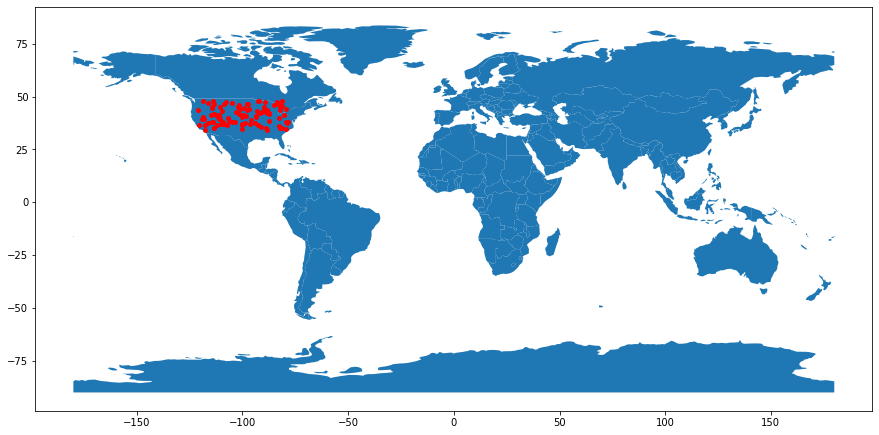

In [337]:
################ NOT FOR EDIT - NOT A MUST #################
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

df_ = df.sort_index()[:100]
geometry = [Point(xy) for xy in zip(df_["longitude"], df_["latitude"])]
gdf = GeoDataFrame(df_, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 15)), marker='o', color='red', markersize=15)
################ NOT FOR EDIT - NOT A MUST #################

# Find Anomaly

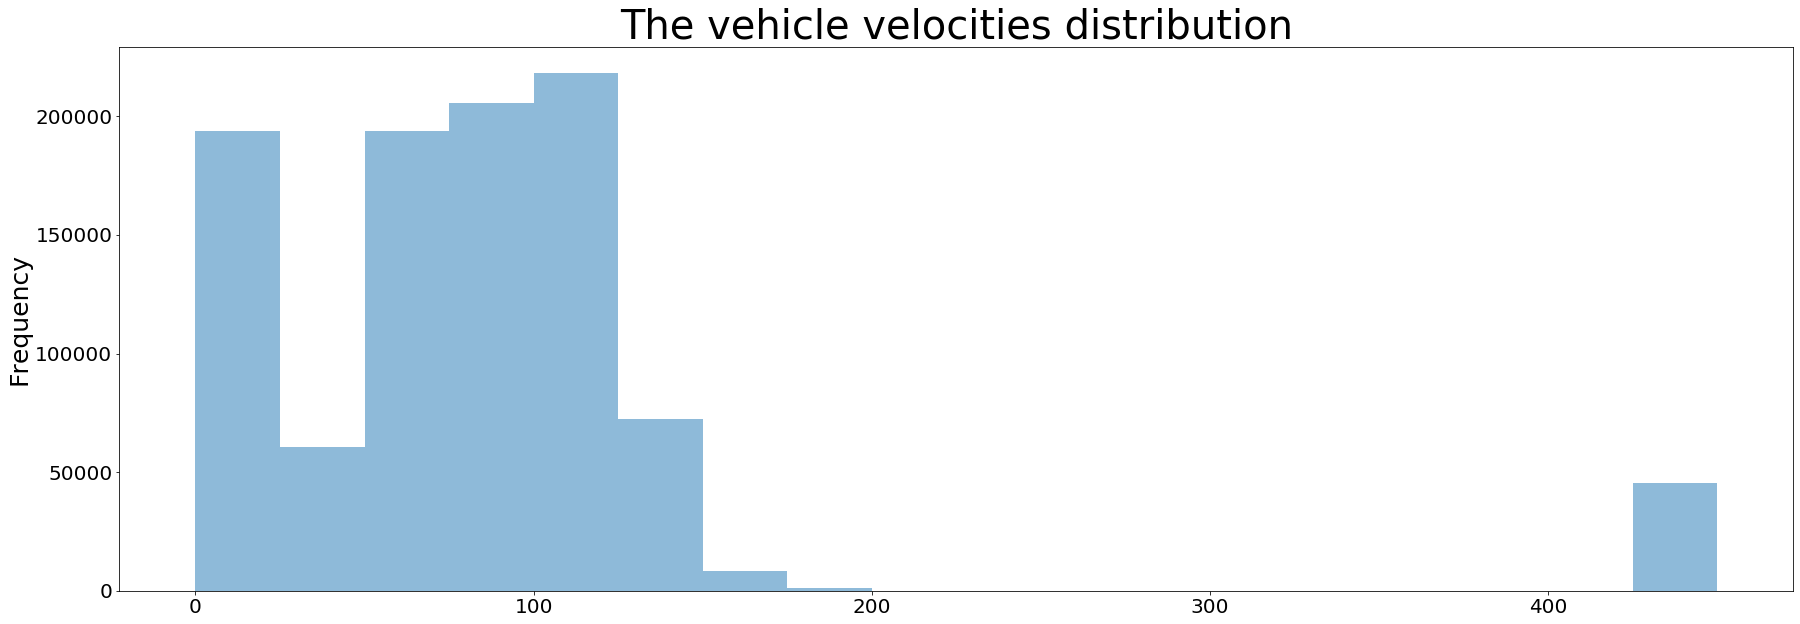

In [380]:
# 1. Show the vehicle velocities distribution
# 2. Try to explain its charestaristics and peaks
# 3. What whould be suspected as anomaly?
#### EDIT #####
#1)

ax=df["velocity"].plot.hist(bins=18, alpha=0.5,figsize=(30,10),title='The vehicle velocities distribution')
params = {'ytick.labelsize': 20,
          'axes.titlesize': 40,
          'xtick.labelsize': 20,
          'axes.labelsize': 25}
plt.rcParams.update(params)

#2) Most of the data for velocities are between 0 and 150. More observations of velocities continue to a little over 200 and there is an unusual observation of 450. There is a decrease in observations in values between 30 and 70 and between 70 and 130 there is an increase and then there are extreme decreases in observations.
#   We get a local maximum at sea between 0 and 30 and an absolute maximum between 100 and 130.

#3) Observations that the velocities get values greater than 400.

#### EDIT #####

In [340]:
# Explore the data to find what is common between the anomalies
#### EDIT #####

# Let's look at the data that receives a value of velocities that is greater than 400.
anomaly_data=df[df["velocity"]>400]
display(anomaly_data)

# We will note that the vehicle 4T1BF1FK8FUB03575 appears in all the observations that appear before us.

# We will check whether it is possible that the vehicle 4T1BF1FK8FUB03575 has a problem and 
# therefore we receive unusual observations and therefore we will look at all the messages 
# received from the vehicle 4T1BF1FK8FUB03575 and compare the data.

vin_4T1BF1_data=df[df["vin"]=="4T1BF1FK8FUB03575"]

equal_data=anomaly_data.equals(vin_4T1BF1_data)
 
print("We got " +str(equal_data))

# We will check whether the vehicle 4T1BF1FK8FUB03575 different values of velocity 
# or whether the vehicle sent the same value all the time.

print("We got " +str(vin_4T1BF1_data["vin"].nunique()))


# We received that all the velocities above 400 belong to the vehicle 4T1BF1FK8FUB03575 
# and that the vehicle 4T1BF1FK8FUB03575 did not send any number other than 450.

#### EDIT #####

,Unnamed: 0,vin,manufacturer,year,model,latitude,longitude,timestamp,velocity
timestamp,,,,,,,,,
2022-07-03 05:48:15.893,334374,4T1BF1FK8FUB03575,Toyota,2015,Camry,41.34,-100.59,2022-07-03 05:48:15.893,450
2022-07-03 05:49:31.893,138252,4T1BF1FK8FUB03575,Toyota,2015,Camry,37.30,-93.94,2022-07-03 05:49:31.893,450
2022-07-03 05:49:51.893,636025,4T1BF1FK8FUB03575,Toyota,2015,Camry,35.91,-84.62,2022-07-03 05:49:51.893,450
2022-07-03 05:49:59.893,727225,4T1BF1FK8FUB03575,Toyota,2015,Camry,47.42,-86.90,2022-07-03 05:49:59.893,450
2022-07-03 05:50:08.893,299232,4T1BF1FK8FUB03575,Toyota,2015,Camry,35.23,-108.26,2022-07-03 05:50:08.893,450
...,...,...,...,...,...,...,...,...,...
2022-07-14 19:32:33.870,163371,4T1BF1FK8FUB03575,Toyota,2015,Camry,36.17,-98.42,2022-07-14 19:32:33.870,450
2022-07-14 19:32:40.870,173839,4T1BF1FK8FUB03575,Toyota,2015,Camry,40.17,-90.53,2022-07-14 19:32:40.870,450
2022-07-14 19:32:41.870,352041,4T1BF1FK8FUB03575,Toyota,2015,Camry,41.58,-80.37,2022-07-14 19:32:41.870,450


We got True
We got 1


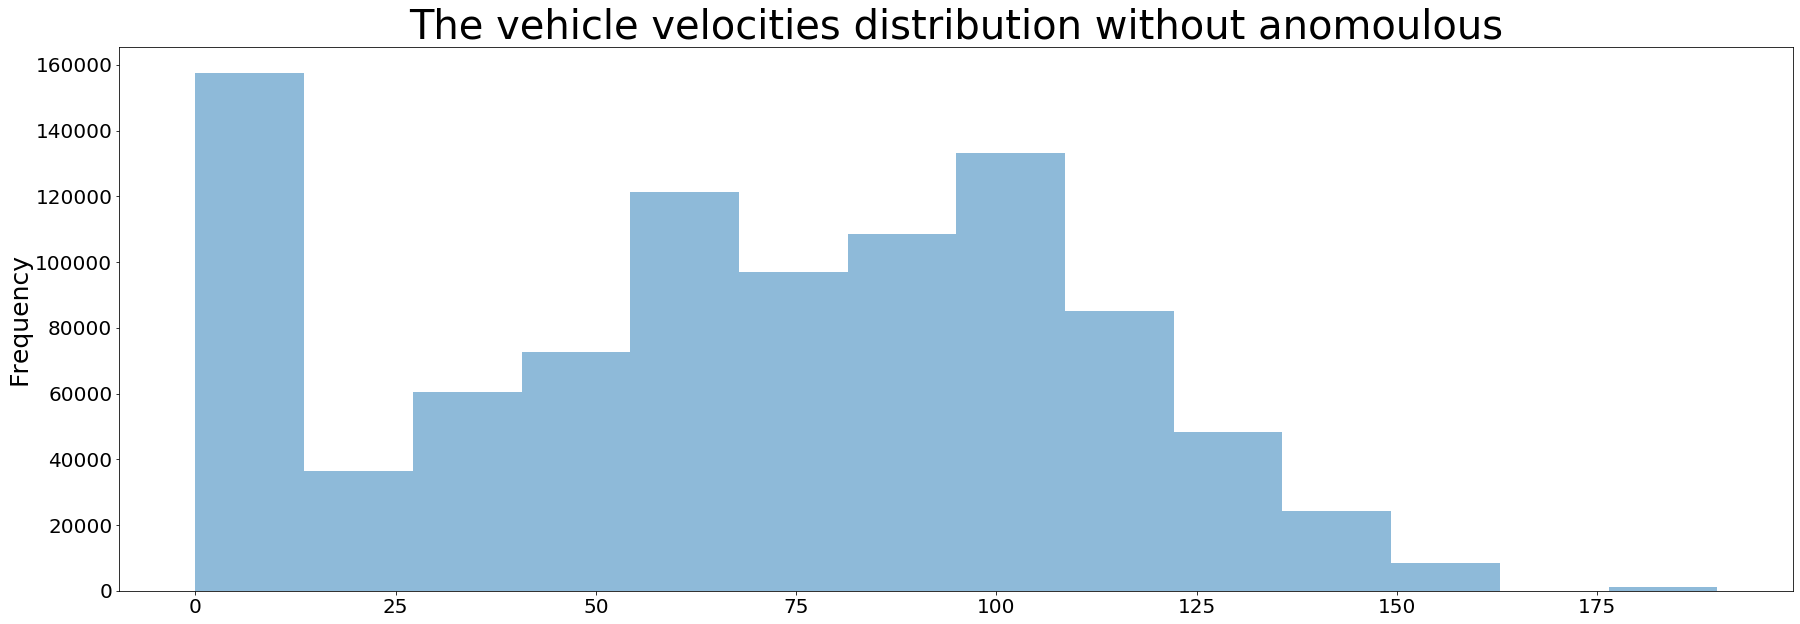

In [381]:
# 1. Create a new dataframe and eliminate the anomoulous messages from it
# 2. Show the velocity distribution again
#### EDIT #####

vehicles_messages_data=df[df["velocity"]!=450]

ax=vehicles_messages_data["velocity"].plot.hist(bins=14, alpha=0.5,figsize=(30,10),title='The vehicle velocities distribution without anomoulous')
params = {'ytick.labelsize': 20,
          'axes.titlesize': 40,
          'xtick.labelsize': 20,
          'axes.labelsize': 25}
plt.rcParams.update(params)

#### EDIT #####

# Predict Velocities

- In this section you will preprocess data, build a model and evaluate it
- You will use every 20m average from every single vehicle to predict its next 20m average

## Preprocess Data - Get Vehicles of Interest

In [158]:
# Show all the vehicles total count of messages per manufacturer and model
#### EDIT #####


def count_messeges(data):
    manufacturer_freq=pd.DataFrame(data["manufacturer"].value_counts())
    grouped=data.groupby(['manufacturer','model']).count()
    grouped=pd.DataFrame(grouped["vin"])
    grouped['Amount of messages'] = grouped.groupby([grouped.index.get_level_values(0)])["vin"].transform('sum')
    grouped=grouped.set_index([grouped.index.get_level_values(0),"Amount of messages",grouped.index.get_level_values(1)])
    grouped.rename({'vin': 'Amount of messages'}, axis=1, inplace=True)
    grouped=grouped.set_index([grouped.index.get_level_values(0),grouped.index.get_level_values(1),grouped.index.get_level_values(2),"Amount of messages"])
    return(grouped)
count_messeges(vehicles_messages_data)
#### EDIT #####

,,,
manufacturer,Amount of messages,model,Amount of messages
Buick,45376,LeSabre,45376
Alfa Romeo,45597,Spider,45597
Aston Martin,45339,V8 Vantage,45339
Dodge,45472,Dakota,45472
Ferrari,45740,F430,45740
Fiat,45344,500,45344
Ford,45578,Escape,45578
Hyundai,45492,Azeraz,45492
Infinity,45649,G37,45649


In [159]:
# 1. Create a new dataframe from Toyota and Volksvagen vehicles (manufacturer) only
# 2. Show the total counts again (as was done in the previuos cells)
#### EDIT #####
Toyota_Volksvagen_data=vehicles_messages_data.loc[(vehicles_messages_data['manufacturer'] =="Toyota" ) | (vehicles_messages_data['manufacturer'] == "Volkswagen")]
count_messeges(Toyota_Volksvagen_data)
#### EDIT #####

Empty DataFrame
Columns: []
Index: [(Toyota, 135724, Camry, 45437), (Toyota, 135724, RAV4, 45276), (Toyota, 135724, Tacoma, 45011), (Volkswagen, 136327, CC, 44939), (Volkswagen, 136327, Golf, 45338), (Volkswagen, 136327, Passat, 46050)]

## Dataset Creation

In [49]:
# Show the start and end time for each vechile
#### EDIT #####
start_time=Toyota_Volksvagen_data.loc[Toyota_Volksvagen_data.groupby('vin').timestamp.idxmin()][['vin','timestamp']]
start_time.rename({'timestamp': 'start timestamp'}, axis=1, inplace=True)
end_time=Toyota_Volksvagen_data.loc[Toyota_Volksvagen_data.groupby('vin').timestamp.idxmax()][['vin','timestamp']]
end_time.rename({'timestamp': 'end timestamp'}, axis=1, inplace=True)
pd.merge(start_time, end_time, on='vin', how='outer')



#### EDIT #####

,vin,start timestamp,end timestamp
0,4TAPN62N0TZ087521,2022-07-03 05:48:10.893,2022-07-14 19:34:43.870
1,9BWEL41J484018815,2022-07-03 05:48:29.893,2022-07-14 19:34:28.870
2,JT2BG22KXW0164520,2022-07-03 05:48:06.893,2022-07-14 19:34:22.870
3,JTMKF4DV0A5016322,2022-07-03 05:48:45.893,2022-07-14 19:34:00.870
4,WVWHP9AN8AE560303,2022-07-03 05:48:27.893,2022-07-14 19:34:29.870
5,WVWPH63B63E455188,2022-07-03 05:48:11.893,2022-07-14 19:34:36.870


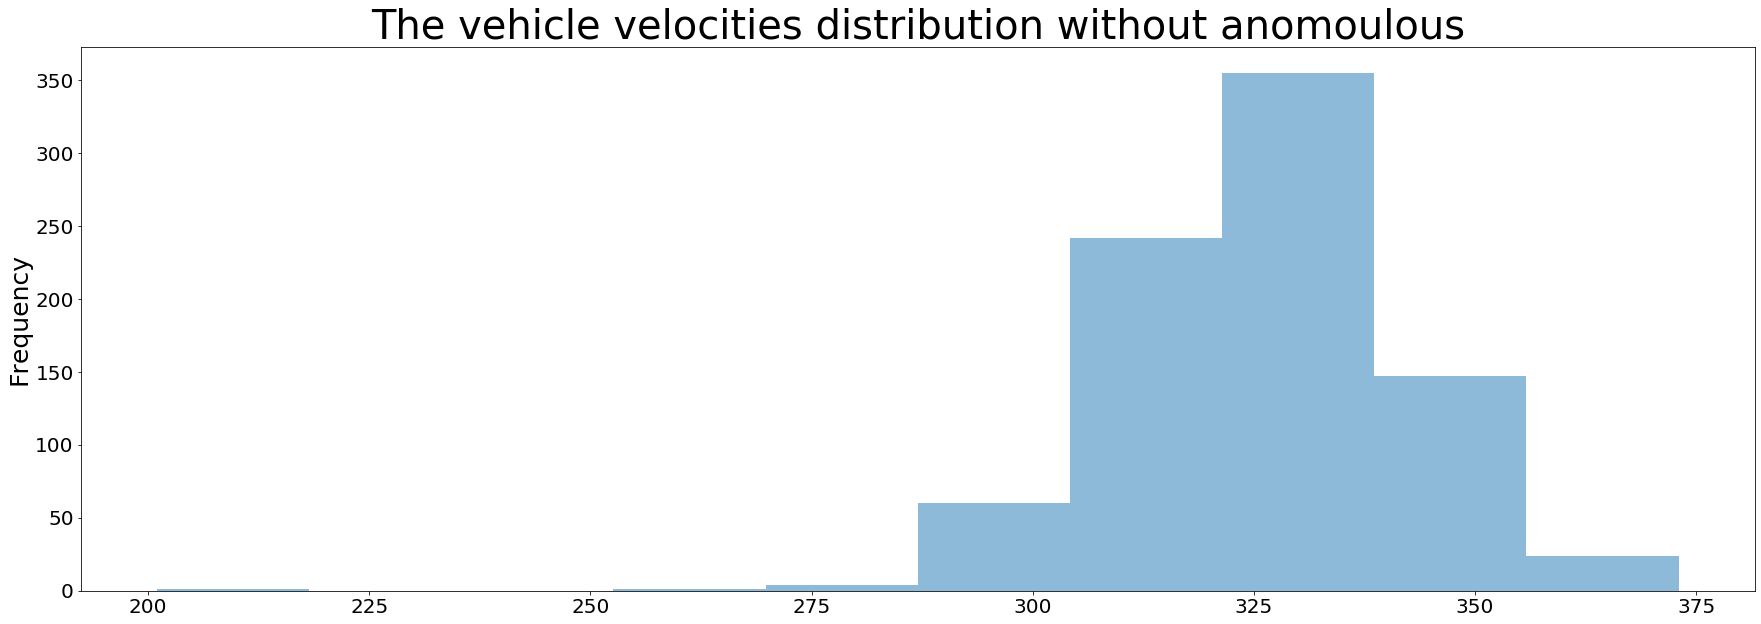

In [384]:
# 1. Show the distribution of messages count per 20 minutes bin (before the previuos aggregation)
# 2. Validate the aggregation: do count per 20 minutes makes sense to infer average from?

#### EDIT #####

per20_data = Toyota_Volksvagen_data["timestamp"].groupby(pd.Grouper(freq='20Min'))
ax=per20_data.count().plot(kind="hist",alpha=0.5,figsize=(30,10),title='The messages count per 20 minutes distribution without anomoulous')

params = {'ytick.labelsize': 20,
          'axes.titlesize': 40,
          'xtick.labelsize': 20,
          'axes.labelsize': 25}
plt.rcParams.update(params)

# 2) Yes. There is a distribution that resembles normal even though there are a few observations on the side that impair the shape. And it's a shape that's good for trying to predict things related to speed

#### EDIT #####

In [388]:
# 1. Create a new dataframe having one data column of the mean velocity per 20 minutes per vechile
# (Use resmaple for this task. make sure that "vin" and "timestamp" are multiindex after creating this dataframe) 
# 2. Show table
#### EDIT #####
data_per_20=Toyota_Volksvagen_data[["timestamp","vin","velocity"]].groupby(['vin']).resample('20min',on='timestamp').mean()
data_per_20

#### EDIT #####

velocity
vin               timestamp                     
4TAPN62N0TZ087521 2022-07-03 05:40:00  68.048780
                  2022-07-03 06:00:00  58.000000
                  2022-07-03 06:20:00  65.283019
                  2022-07-03 06:40:00  65.636364
                  2022-07-03 07:00:00  70.701754
...                                          ...
WVWPH63B63E455188 2022-07-14 18:00:00  72.142857
                  2022-07-14 18:20:00  74.468085
                  2022-07-14 18:40:00  68.688525
                  2022-07-14 19:00:00  84.166667
                  2022-07-14 19:20:00  64.000000

[5004 rows x 1 columns]

In [317]:
# 1.Create a new dataframe that has the "vin" and "timestamp" as columns again by reseting the index and keeping them
# 2. Set timestamp as index again, and show the table
#### EDIT #####
data_vin_time=Toyota_Volksvagen_data[["timestamp","vin"]]
data_vin_time=data_vin_time.sort_index()
data_vin_time
#### EDIT #####

,timestamp,vin
timestamp,,
2022-07-03 05:48:06.893,2022-07-03 05:48:06.893,JT2BG22KXW0164520
2022-07-03 05:48:10.893,2022-07-03 05:48:10.893,4TAPN62N0TZ087521
2022-07-03 05:48:11.893,2022-07-03 05:48:11.893,WVWPH63B63E455188
2022-07-03 05:48:14.893,2022-07-03 05:48:14.893,JT2BG22KXW0164520
2022-07-03 05:48:21.893,2022-07-03 05:48:21.893,4TAPN62N0TZ087521
...,...,...
2022-07-14 19:34:22.870,2022-07-14 19:34:22.870,JT2BG22KXW0164520
2022-07-14 19:34:28.870,2022-07-14 19:34:28.870,9BWEL41J484018815
2022-07-14 19:34:29.870,2022-07-14 19:34:29.870,WVWHP9AN8AE560303


In [448]:
# 1. Create a new column (the target column) having the 20 minutes velocity mean prior the current one, 
#    for every row and *for each vehilcle separately* 
# 2. Show df
#### EDIT #####
past=Toyota_Volksvagen_data[["timestamp","vin","velocity"]].groupby(['vin']).resample('20min', loffset=pd.Timedelta("+00:20:00")).mean()
past.rename({'velocity': 'prior'}, axis=1, inplace=True)
data_per_20.rename({'velocity': 'predict'}, axis=1, inplace=True)
merged_df = pd.concat([past,data_per_20], axis=1)
merged_df = merged_df.reset_index()
merged_df.set_index('timestamp', inplace=True,drop=False)
merged_df=merged_df.sort_index()
merged_df.index.names = ['index']
merged_df
#### EDIT #####

,vin,timestamp,prior,predict
index,,,,
2022-07-03 05:40:00,4TAPN62N0TZ087521,2022-07-03 05:40:00,NaN,68.048780
2022-07-03 05:40:00,JT2BG22KXW0164520,2022-07-03 05:40:00,NaN,75.789474
2022-07-03 05:40:00,WVWPH63B63E455188,2022-07-03 05:40:00,NaN,76.969697
2022-07-03 05:40:00,WVWHP9AN8AE560303,2022-07-03 05:40:00,NaN,76.153846
2022-07-03 05:40:00,JTMKF4DV0A5016322,2022-07-03 05:40:00,NaN,86.000000
...,...,...,...,...
2022-07-14 19:40:00,JTMKF4DV0A5016322,2022-07-14 19:40:00,68.717949,NaN
2022-07-14 19:40:00,9BWEL41J484018815,2022-07-14 19:40:00,65.555556,NaN
2022-07-14 19:40:00,4TAPN62N0TZ087521,2022-07-14 19:40:00,70.526316,NaN


In [457]:
# 1. Create a new dataset, remove rows with nulls 
# 2. show table
#### EDIT #####
merged_df=merged_df.dropna()
merged_df
#### EDIT #####

,vin,timestamp,prior,predict
index,,,,
2022-07-03 06:00:00,4TAPN62N0TZ087521,2022-07-03 06:00:00,68.048780,58.000000
2022-07-03 06:00:00,JT2BG22KXW0164520,2022-07-03 06:00:00,75.789474,73.281250
2022-07-03 06:00:00,WVWPH63B63E455188,2022-07-03 06:00:00,76.969697,66.666667
2022-07-03 06:00:00,9BWEL41J484018815,2022-07-03 06:00:00,66.071429,75.789474
2022-07-03 06:00:00,JTMKF4DV0A5016322,2022-07-03 06:00:00,86.000000,74.545455
...,...,...,...,...
2022-07-14 19:20:00,JT2BG22KXW0164520,2022-07-14 19:20:00,60.232558,74.146341
2022-07-14 19:20:00,WVWPH63B63E455188,2022-07-14 19:20:00,84.166667,64.000000
2022-07-14 19:20:00,4TAPN62N0TZ087521,2022-07-14 19:20:00,69.347826,70.526316


In [458]:
# 1. save dataframe as "exp_df.csv"
#### EDIT #####
merged_df.to_csv("exp_df.csv")
#### EDIT #####

## Create Expirement

In [463]:
#### NOT FOR EDIT #####
df_ml = pd.read_csv("exp_df.csv")
#### NOT FOR EDIT #####

In [464]:
# 1. Define x and y from the problem (x is the prior mean velocity, y is the current mean velocity)
# 2. print thier shapes
#### EDIT #####
df_ml.set_index('index', inplace=True)
print(df_ml.shape)
#### EDIT #####


(4998, 4)


,vin,timestamp,prior,predict
index,,,,
2022-07-03 06:00:00,4TAPN62N0TZ087521,2022-07-03 06:00:00,68.048780,58.000000
2022-07-03 06:00:00,JT2BG22KXW0164520,2022-07-03 06:00:00,75.789474,73.281250
2022-07-03 06:00:00,WVWPH63B63E455188,2022-07-03 06:00:00,76.969697,66.666667
2022-07-03 06:00:00,9BWEL41J484018815,2022-07-03 06:00:00,66.071429,75.789474
2022-07-03 06:00:00,JTMKF4DV0A5016322,2022-07-03 06:00:00,86.000000,74.545455
...,...,...,...,...
2022-07-14 19:20:00,JT2BG22KXW0164520,2022-07-14 19:20:00,60.232558,74.146341
2022-07-14 19:20:00,WVWPH63B63E455188,2022-07-14 19:20:00,84.166667,64.000000
2022-07-14 19:20:00,4TAPN62N0TZ087521,2022-07-14 19:20:00,69.347826,70.526316


In [485]:
# Split the dataset to train and test (80%, 20%), show shapes of x,y (train and test)
# Explaing how did you choose what data is in the train set and what goes to the test set

#### EDIT #####


vin_values=set(df_ml["vin"])
train_data=pd.DataFrame(columns = ['vin', 'timestamp', 'prior',"predict"])
train_data.index.names = ['index']
test_data=pd.DataFrame(columns = ['vin', 'timestamp', 'prior',"predict"])
test_data.index.names = ['index']


for name in vin_values:
    vin_data=df_ml[df_ml["vin"]==name]
    train_name=vin_data.head(int(len(vin_data)*(80/100)))
    test_name=vin_data.tail(int(len(vin_data)*(20/100))) 
    train_data=pd.concat([train_data,train_name])
    test_data=pd.concat([test_data,test_name])


#### EDIT #####


In [499]:
# 1. Create a decision tree regressor object to be used for our prediction task
# 2. Reshape x_train and x_test with x_.values.reshape(-1, 1)
# 3. fit the model, than predict with test set into y_hat
#### EDIT #####
from sklearn.metrics import mean_squared_error
y_train=train_data["predict"]
y_test=test_data["predict"]
x_train=train_data["prior"]
x_test=test_data["prior"]
x_train=x_train.values.reshape(-1, 1)
x_test=x_test.values.reshape(-1, 1)
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(x_train, y_train)
print(mean_squared_error(regressor.predict(x_train),y_train))
y_1 = regressor.predict(x_test)
y_1
print(mean_squared_error(y_test, y_1))



#### EDIT #####

33.714618044229596
33.01482368732678


## Evaluate

In [ ]:
# 1. How do you know how good is the model?
# 2. What evaluation metric will be relevant here?
# 3. Evaluate the model error and print the result
#### EDIT #####

#### EDIT #####

In [ ]:
# investiage the error:
# 1. Assuming that every velocity in this dataset was radnomaly sampled from a known same distribution, 
# *regardless the timestamp and the vehicle identity*, what would you expect from the model evaluated error?
# 2. Is the error what you expected it to be? If yes, explain why
# 3. If not, what can be changed in the notebook to get the expected error?
# 4. Demonstrate your answers and/or assumptions with graphs/histograms/charts
#### EDIT #####

#### EDIT #####